**Loading Stopwords from a Text File and Displaying the List**

In [ ]:
import pandas as pd
import seaborn as sns
stop=[]
st = pd.read_csv('RomanUrdu_StopWords.txt', encoding="ISO-8859-1",header=None)
stop=list(st[0])
print (stop)

['ai', 'ayi', 'hy', 'hai', 'main', 'ki', 'tha', 'koi', 'ko', 'sy', 'woh ', 'bhi', 'aur', 'wo', 'yeh', 'rha', 'hota', 'ho', 'ga', 'ka', 'le', 'lye ', 'kr', 'kar', 'lye', 'liye', 'hotay', 'waisay', 'gya', 'gaya', 'kch', 'ab', 'thy', 'thay', 'houn', 'hain', 'han', 'to', 'is', 'hi', 'jo', 'kya', 'thi', 'se', 'pe', 'phr', 'wala', 'waisay', 'us', 'na', 'ny', 'hun', 'rha', 'raha', 'ja', 'rahay', 'abi', 'uski', 'ne', 'haan', 'acha', 'nai', 'sent', 'photo', 'you', 'kafi', 'gai', 'rhy', 'kuch', 'jata', 'aye', 'ya', 'dono', 'hoa', 'aese', 'de', 'wohi', 'jati', 'jb', 'krta', 'lg', 'rahi', 'hui', 'karna', 'krna', 'gi', 'hova', 'yehi', 'jana', 'jye', 'chal', 'mil', 'tu', 'hum', 'par', 'hay', 'kis', 'sb', 'gy', 'dain', 'krny', 'tou']


**Importing Libraries for Data Processing, Visualization, and Model Evaluation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk import word_tokenize
from sklearn.linear_model import LogisticRegression

**Text Cleaning Functions: Removing Unwanted Characters and Stopwords**

In [ ]:
def cleaner(word):
    word = re.sub(r'\#\.', '', word)
    word = re.sub(r'\n', '', word)
    word = re.sub(r',', '', word)
    word = re.sub(r'\-', ' ', word)
    word = re.sub(r'\.', '', word)
    word = re.sub(r'\\', ' ', word)
    word = re.sub(r'\\x\.+', '', word)
    word = re.sub(r'\d', '', word)
    word = re.sub(r'^_.', '', word)
    word = re.sub(r'_', ' ', word)
    word = re.sub(r'^ ', '', word)
    word = re.sub(r' $', '', word)
    word = re.sub(r'\?', '', word)
    word = re.sub(r'\x93', '', word)
    word = re.sub(r'\x9d', '', word)
    word = re.sub(r'\x1c', '', word)
    for i in stop:
        word = re.sub(i, '', word)
    return word.lower()


def array_cleaner(array):
    X = []
    for sentence in array:
        clean_sentence = ''
        words = sentence.split(' ')
        for word in words:
            clean_sentence = clean_sentence +' '+ cleaner(word)
        X.append(clean_sentence)
    return X

**Loading and Visualizing Sentiment Distribution in the Roman Urdu Dataset**

In [ ]:
data = pd.read_csv('Roman_Urdu_DataSet.csv', usecols = [0,1], names = ['review','sentiment'],encoding="ISO-8859-1",header=None)

Neutral     7857
Positive    6360
Negative    6047
Name: sentiment, dtype: int64



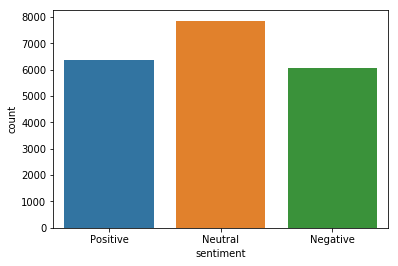

In [ ]:
print(data['sentiment'].value_counts())
print()
sns.countplot(data['sentiment'])

**Preprocessing Reviews: Lowercasing, Removing Punctuation, Special Characters, and Numbers**

In [ ]:
import string
def review_preprocessing(input_review):
    input_review = input_review.astype(str).str.lower() #converting to lower case
    input_review = input_review.astype(str).str.replace('[{}]'.format(string.punctuation), '') #remove punctuation
    input_review = input_review.astype(str).str.replace("[^a-zA-Z#]",' ') #remove special characters
    input_review = input_review.apply(lambda x: ' '.join([word for word in str(x).split() if not word.isdigit() ])) #remove numbers
    input_review = input_review.astype(str).str.strip() #remove spaces
    return input_review

In [ ]:
data['review'] = review_preprocessing(data['review'])

In [ ]:
data. duplicated().sum()

83

In [ ]:
data = data.drop_duplicates(keep='first').reset_index(drop = True)

C:\Users\M_ADEEL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


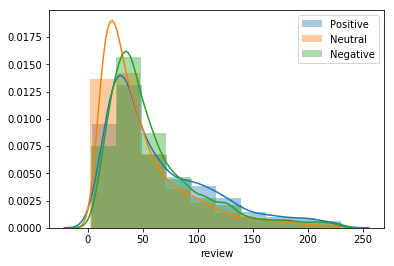

In [ ]:
sns.distplot (data.review.str.len()[data['sentiment']=='Positive'], bins=10, label='Positive')
sns.distplot (data.review.str.len()[data['sentiment']=='Neutral'], bins=10, label='Neutral')
sns.distplot (data.review.str.len()[data['sentiment']=='Negative'], bins=10, label='Negative')
plt.legend()
plt.show()

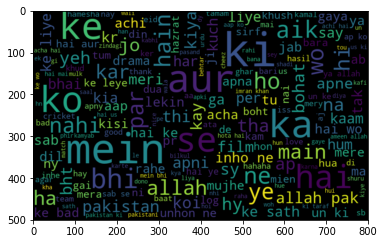

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Positive']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

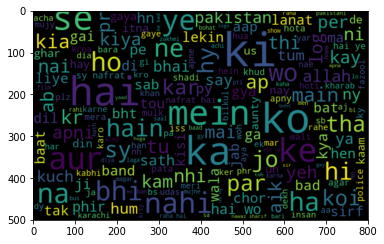

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Negative']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

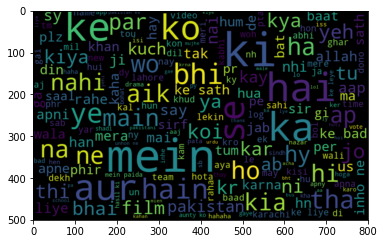

In [ ]:
from wordcloud import WordCloud
all_words = ' '.join([word for word in data[data['sentiment'] == 'Neutral']['review']])
wordcloud_gen = WordCloud(width=800, height=500, random_state=1, max_font_size=110).generate(all_words)
plt.imshow(wordcloud_gen, interpolation="bilinear")
plt.show()

In [ ]:

import re

In [ ]:
# from wordcloud import WordCloud
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import RandomForestClassifier

In [ ]:
numpy_array = data.as_matrix()
X = numpy_array[:, 0]
# Clean X here
X = array_cleaner(X)
y = numpy_array[:, 1]

C:\Users\M_ADEEL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import model_selection, naive_bayes, svm

**Splitting Data, Vectorization, Model Training, and Evaluation**

[[ 665  400  144]
 [ 233 1125  187]
 [ 138  393  752]]
              precision    recall  f1-score   support

    Negative       0.64      0.55      0.59      1209
     Neutral       0.59      0.73      0.65      1545
    Positive       0.69      0.59      0.64      1283

   micro avg       0.63      0.63      0.63      4037
   macro avg       0.64      0.62      0.63      4037
weighted avg       0.64      0.63      0.63      4037

62.97 %
Learning end


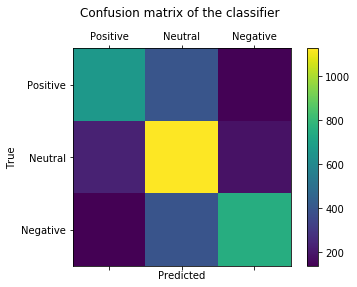

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

'''
Step 6: convert a collection of raw documents to a matrix
'''

from sklearn.feature_extraction.text import TfidfVectorizer
ngram = 3
vectorizer = TfidfVectorizer()
X_train_vector = vectorizer.fit_transform(X_train)
X_test_vector = vectorizer.transform(X_test)


'''
this is for the HashingVectorizer
'''
# from sklearn.feature_extraction.text import HashingVectorizer
# vectorizer = HashingVectorizer(n_features=2**4)
# X_train_vector = vectorizer.fit_transform(X_train)
# X_test_vector = vectorizer.transform(X_test)

'''
Step 8: Creating classifier and fitting data in classifier
'''
# from sklearn.svm import SVC
# classifier = SVC(kernel='linear', C=1.0, degree=3, random_state=0)
# classifier.fit(X_train_vector, y_train)


# classifier = KNeighborsClassifier(n_neighbors=3)
# classifier.fit(X_train_vector, y_train)


# classifier=AdaBoostClassifier(n_estimators=50,learning_rate=1)
# classifier.fit(X_train_vector, y_train)


# classifier = RandomForestClassifier(n_estimators=100, random_state=0)
# classifier.fit(X_train_vector, y_train)


# classifier = naive_bayes.MultinomialNB()
# classifier.fit(X_train_vector, y_train)

classifier=LogisticRegression(random_state=0,solver='liblinear',multi_class='ovr')
classifier.fit(X_train_vector, y_train)
y_pred=classifier.predict(X_test_vector)

'''
Step 9 : Pickling the Model
'''
import pickle
#To reuse, we can dump the model and load whenever or where-ever you want.
#Vocabulary is also needed to vectorize the new documents while predicting the label.

# pickling the vectorizer
pickle.dump(vectorizer, open('logisticvectorizer.sav', 'wb'))
# pickling the model
pickle.dump(classifier, open('logisticclassifier.sav', 'wb'))

'''
Step 9: Perform Prediction
'''
y_pred=classifier.predict(X_test_vector)

'''
Step 10: Create Confusion Matrix
'''
ConfusionMatrix=confusion_matrix(y_test, y_pred)
print(ConfusionMatrix)
'''
Step 11: Evaluation
'''
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))
Accuracy = format(classifier.score(X_test_vector, y_test)*100, '.2f')+ ' %'
file = open('AccuracyPercentage', 'wb')
pickle.dump(Accuracy, file)
file.close()
print(Accuracy)
print('Learning end')

#visualizing confusion matrix

labels=['Positive','Neutral','Negative']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(ConfusionMatrix)
plt.title('Confusion matrix of the classifier \n')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

**Loading a Pre-trained Model and Vectorizer to Predict Sentiment of New Text**

In [ ]:
#testing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle
import re
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from nltk import word_tokenize
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
a="mai thek hn"
l=[]
l.append(a.split())
ngram = 3
vectorizer = pickle.load(open('svmvectorizer.sav', 'rb'))
data = vectorizer.transform([a]).toarray()
# data = vectorizer.transform(a.split())

loaded_model = pickle.load(open('svmclassifier.sav', 'rb'))
loaded_model.predict(data)

array(['Neutral'], dtype=object)